## SMS Spam Classifier

In [1]:
import numpy as np
import pandas as pd

In [6]:
sms_df= pd.read_csv('spam.csv',sep = ",", encoding='latin')

In [7]:
sms_df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4916,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
2431,ham,That's good. Lets thank God. Please complete t...,NaN,NaN,NaN
1498,ham,Time n Smile r the two crucial things in our l...,NaN,NaN,NaN
1990,ham,HI DARLIN IVE JUST GOT BACK AND I HAD A REALLY...,NaN,NaN,NaN
2220,ham,But really quite funny lor wat... Then u shd h...,NaN,NaN,NaN


In [8]:
sms_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


STEPS:
1. Data Cleaning
2. EDA
3. Text Pre-processing
4. Model building
5. Evaluation
6. Imporvement
7. Application Interface
8. Deployement

### Data cleaning!

In [11]:
sms_df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace=True)

In [13]:
sms_df.sample(5)

,v1,v2
1407,ham,Then we gotta do it after that
1812,ham,\Getting tickets 4 walsall tue 6 th march. My ...
4367,ham,1 I don't have her number and 2 its gonna be a...
3972,ham,"Night night, see you tomorrow"
1654,ham,"Wishing you and your family Merry \X\"" mas and..."


In [14]:
#Rename the columns

sms_df.rename(columns={'v1':'Target','v2':'Text'},inplace=True)

In [15]:
sms_df.head()

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [20]:
sms_df['Target'] =encoder.fit_transform(sms_df['Target'])

In [21]:
sms_df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [22]:
sms_df.isna().sum()

Target    0
Text      0
dtype: int64

In [23]:
sms_df.duplicated().sum()

403

In [24]:
sms_df =sms_df.drop_duplicates(keep='first')

In [25]:
sms_df.shape

(5169, 2)

### EDA!

In [26]:
sms_df['Target'].value_counts()

0    4516
1     653
Name: Target, dtype: int64

In [27]:
import matplotlib.pyplot as plt

([<matplotlib.patches.Wedge at 0x210c148f9a0>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

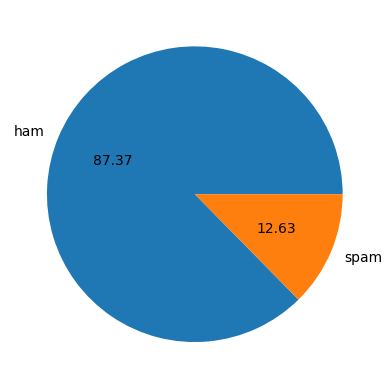

In [31]:
plt.pie(sms_df['Target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")

In [32]:
# Data is imbalanced

In [35]:
import nltk

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shubh\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [38]:
sms_df['num_chars'] =sms_df['Text'].apply(len)

In [41]:
sms_df['num_words'] = sms_df['Text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [42]:
sms_df.head()

,Target,Text,num_chars,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [43]:
sms_df['num_sentences'] = sms_df['Text'].apply(lambda x: len(nltk.sent_tokenize(x)))


In [44]:
sms_df.head()

,Target,Text,num_chars,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [46]:
sms_df[['num_chars','num_words','num_sentences']].describe()

,num_chars,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [47]:
#Ham
sms_df[sms_df['Target'] ==0][['num_chars','num_words','num_sentences']].describe()

,num_chars,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [48]:
#Spam
sms_df[sms_df['Target'] ==1][['num_chars','num_words','num_sentences']].describe()

,num_chars,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [49]:
import seaborn as sns

<Axes: xlabel='num_chars', ylabel='Count'>

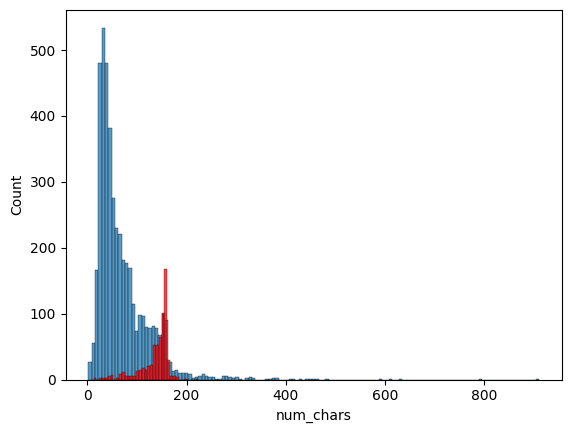

In [54]:
sns.histplot(sms_df[sms_df['Target'] ==0]['num_chars'])
sns.histplot(sms_df[sms_df['Target'] ==1]['num_chars'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

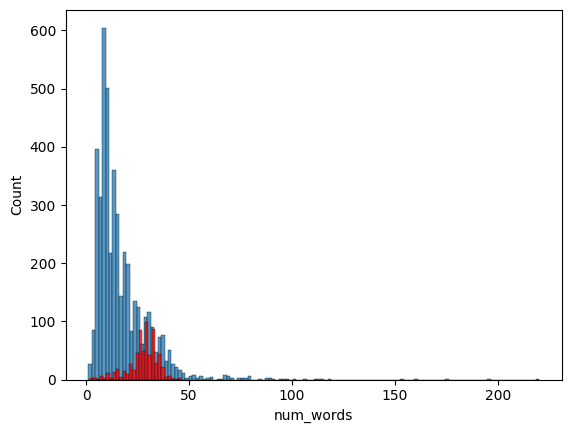

In [55]:
sns.histplot(sms_df[sms_df['Target'] ==0]['num_words'])
sns.histplot(sms_df[sms_df['Target'] ==1]['num_words'],color='red')

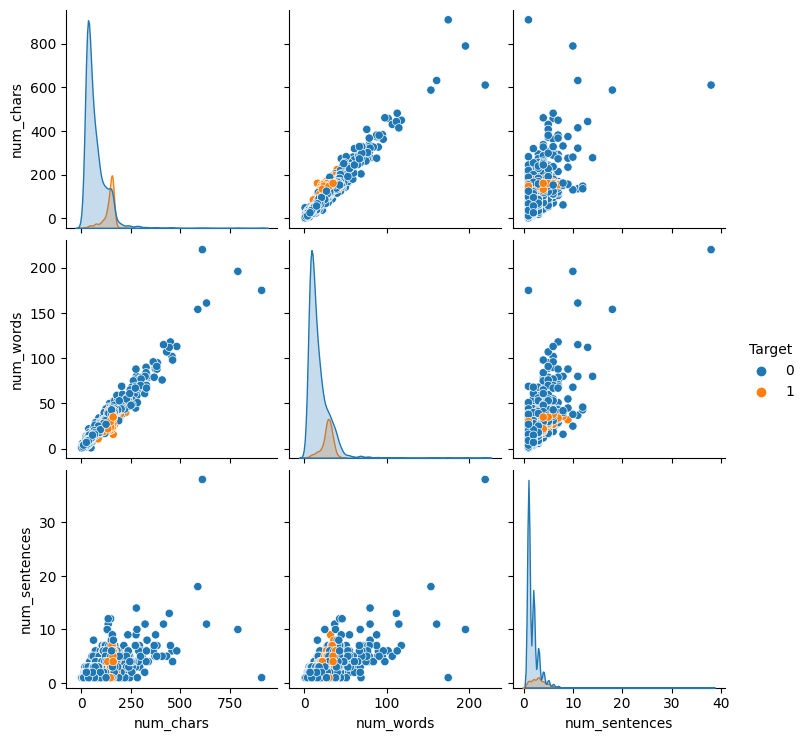

In [57]:
sns.pairplot(sms_df,hue='Target')

<Axes: >

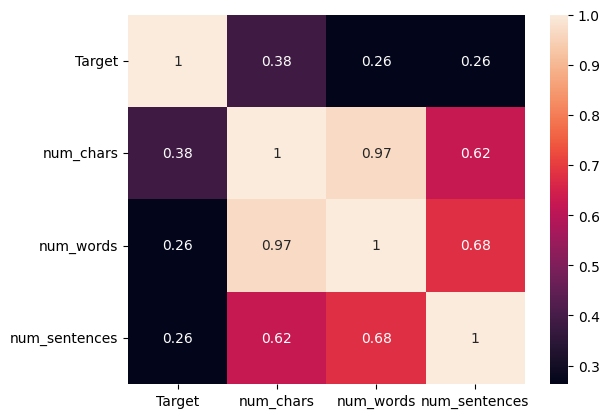

In [59]:
sns.heatmap(sms_df.corr(),annot=True)

In [60]:
# Keep only num_chars columns due to corr()

### Data Preprocessing!

In [67]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)


    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text =y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    text =y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)

In [69]:
transform_text(" I loved the cricket match I went to saw yesterday on the ground with my friends and it was fun!")

'love cricket match went saw yesterday ground friend fun'

In [70]:
sms_df['Transformed_text'] = sms_df['Text'].apply(transform_text)

In [71]:
sms_df.head()

,Target,Text,num_chars,num_words,num_sentences,Transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [85]:
# Word cloud
from wordcloud import WordCloud
wc = WordCloud(width=2500,height=2500,min_font_size=30,background_color='white')

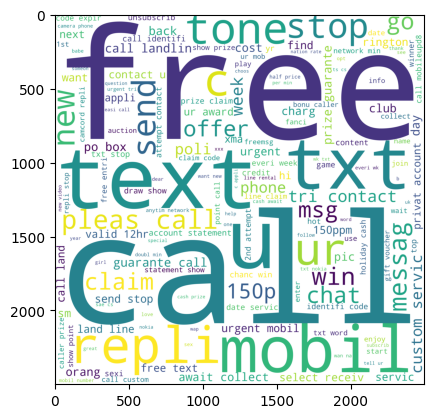

In [86]:
spam_wc =wc.generate(sms_df[sms_df['Target'] ==1]['Transformed_text'].str.cat(sep=" "))

plt.imshow(spam_wc)

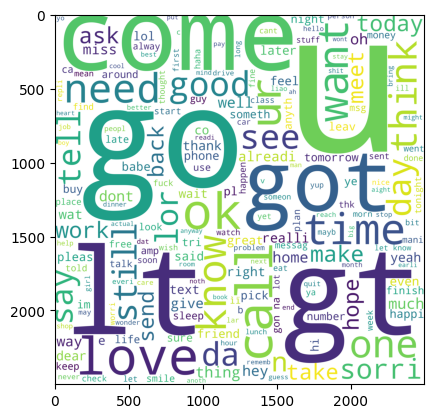

In [109]:
ham_wc =wc.generate(sms_df[sms_df['Target'] ==0]['Transformed_text'].str.cat(sep=" "))

plt.imshow(ham_wc)

In [110]:
spam_corpus=[]
for msg in sms_df[sms_df['Target']==1]['Transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)


In [111]:
len(spam_corpus)

9939

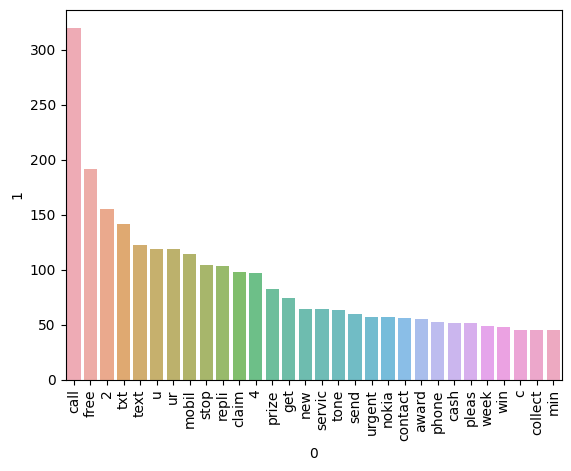

In [112]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1],alpha=0.8)
plt.xticks(rotation='vertical')
plt.show()

In [113]:
ham_corpus=[]
for msg in sms_df[sms_df['Target']==0]['Transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

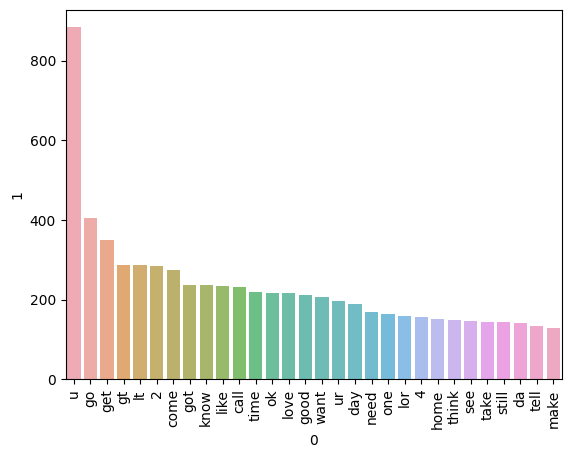

In [108]:
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1],alpha=0.8)
plt.xticks(rotation='vertical')
plt.show()

### Model Building

#### 1. Naive Bayes with CountVectorizer

In [115]:
from sklearn.feature_extraction.text import CountVectorizer
cv= CountVectorizer()

In [116]:
X = cv.fit_transform(sms_df['Transformed_text']).toarray()

In [117]:
X.shape

(5169, 6708)

In [118]:
y= sms_df['Target'].values

In [119]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [121]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=23)

In [126]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [125]:
gnb =GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [127]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8752417794970987
[[801 115]
 [ 14 104]]
0.4748858447488584


In [128]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9777562862669246
[[902  14]
 [  9 109]]
0.8861788617886179


In [129]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.97678916827853
[[915   1]
 [ 23  95]]
0.9895833333333334


In [148]:
# Gaussian is best performer but precision is not 100%

### 1.1 Naive Bayes with TFIDF

In [139]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

In [140]:
X = tfidf.fit_transform(sms_df['Transformed_text']).toarray()

In [141]:
X.shape

(5169, 6708)

In [142]:
y= sms_df['Target'].values

In [143]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=23)

In [144]:
gnb =GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [145]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8723404255319149
[[801 115]
 [ 17 101]]
0.4675925925925926


In [146]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.965183752417795
[[916   0]
 [ 36  82]]
1.0


In [147]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.97678916827853
[[915   1]
 [ 23  95]]
0.9895833333333334


In [149]:
#MultinomialNB with tfidf has 100% precision - higher weight than accuracy due to nature of data

#### Comparing with other models

In [151]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [152]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [153]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [154]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [155]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9729206963249516, 0.9591836734693877)

In [156]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9729206963249516
Precision -  0.9591836734693877
For  KN
Accuracy -  0.9100580270793037
Precision -  1.0
For  NB
Accuracy -  0.965183752417795
Precision -  1.0
For  DT
Accuracy -  0.9381044487427466
Precision -  0.75
For  LR
Accuracy -  0.9545454545454546
Precision -  0.8901098901098901
For  RF
Accuracy -  0.9777562862669246
Precision -  1.0
For  AdaBoost
Accuracy -  0.9671179883945842
Precision -  0.8962264150943396
For  BgC
Accuracy -  0.9632495164410058
Precision -  0.8508771929824561
For  ETC
Accuracy -  0.9787234042553191
Precision -  0.9897959183673469
For  GBDT
Accuracy -  0.9564796905222437
Precision -  0.9010989010989011
For  xgb
Accuracy -  0.9748549323017408
Precision -  0.9423076923076923


In [157]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)


In [158]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.910058,1.000000
2,NB,0.965184,1.000000
5,RF,0.977756,1.000000
8,ETC,0.978723,0.989796
0,SVC,0.972921,0.959184
10,xgb,0.974855,0.942308
9,GBDT,0.956480,0.901099
6,AdaBoost,0.967118,0.896226
4,LR,0.954545,0.890110
7,BgC,0.963250,0.850877


In [159]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [160]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.910058
1,NB,Accuracy,0.965184
2,RF,Accuracy,0.977756
3,ETC,Accuracy,0.978723
4,SVC,Accuracy,0.972921
5,xgb,Accuracy,0.974855
6,GBDT,Accuracy,0.956480
7,AdaBoost,Accuracy,0.967118
8,LR,Accuracy,0.954545
9,BgC,Accuracy,0.963250


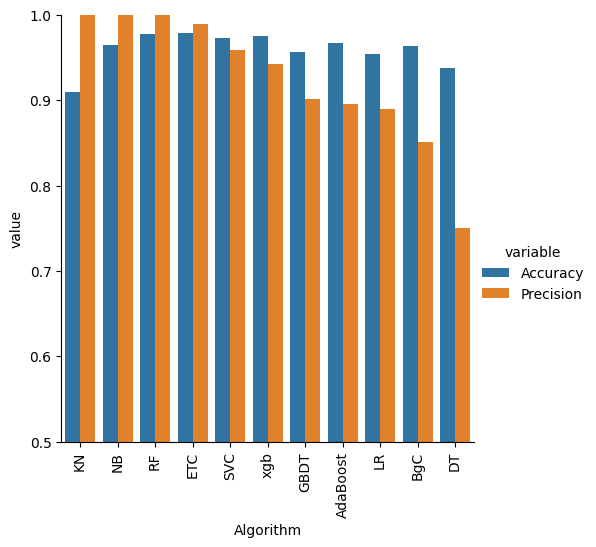

In [161]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [163]:
# Choosing RF

rfc = RandomForestClassifier(n_estimators=50, random_state=2)
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9777562862669246
Precision 1.0


In [164]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(rfc,open('model.pkl','wb'))